## **Assignment 2: Regression and classification**
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

In [86]:
# Import required Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

### **Task 1: Regression**

#### ***a. Find a linear regression model that relates the living area to the selling price.***
#### ***If you did any data cleaning step(s), describe what you did and explain why.***

In [87]:
# Read the given CSV file
df = pd.read_csv('./data/data_assignment2.csv', delimiter=',')

In [88]:
df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


In [89]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


In [90]:
# Remove the unnecessary columns in the data frame
df = df[['ID', 'Living_area', 'Selling_price']]

In [91]:
df.head()

,ID,Living_area,Selling_price
0,1,104,4600000
1,2,99,4450000
2,3,133,4900000
3,4,175,6625000
4,5,118,4600000


In [92]:
# Remove rows with missing values (if there are any)
df = df.dropna()

In [93]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 56


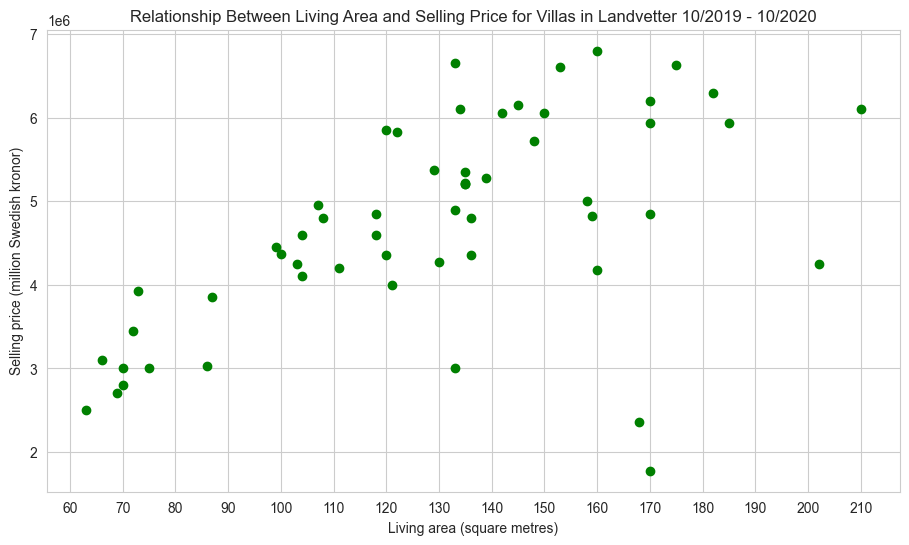

In [94]:
# Draw scatter plot of the data
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Relationship Between Living Area and Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

In [95]:
# Observe some statistics related to the data
df.describe()

,ID,Living_area,Selling_price
count,56.000000,56.000000,5.600000e+01
mean,28.500000,128.678571,4.713125e+06
std,16.309506,36.006619,1.241117e+06
min,1.000000,63.000000,1.775000e+06
25%,14.750000,104.000000,4.075000e+06
50%,28.500000,133.000000,4.812500e+06
75%,42.250000,154.250000,5.831250e+06
max,56.000000,210.000000,6.800000e+06


In [96]:
# Find the two outliers with relatively large living areas but low selling prices for a villa
min_price_outliers = df.nsmallest(n= 2, columns = 'Selling_price')
print(min_price_outliers)

    ID  Living_area  Selling_price
40  41          170        1775000
45  46          168        2360000


In [97]:
# Remove the outliers from the df (as these are special cases which will change the regression line if left)
df = df.drop(min_price_outliers.index)

In [98]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 54


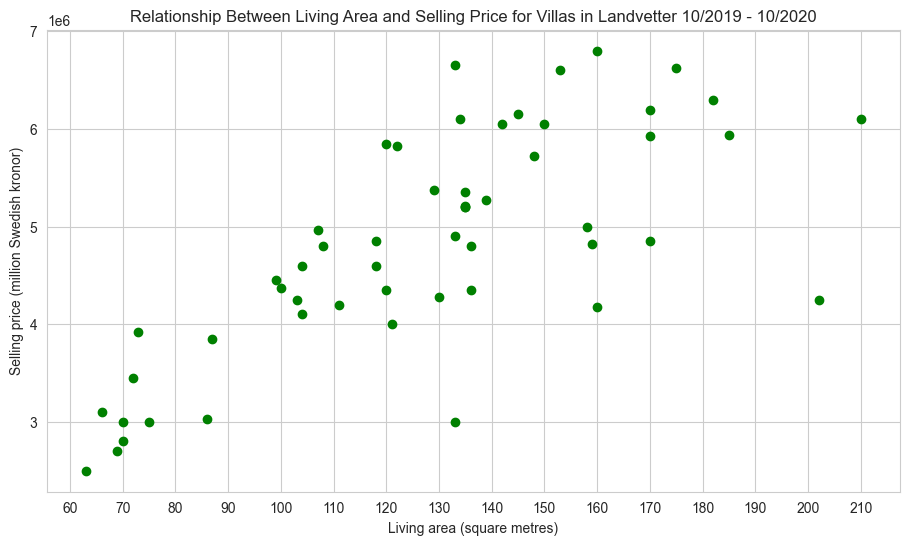

In [99]:
# Draw scatter plot of the data
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Relationship Between Living Area and Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

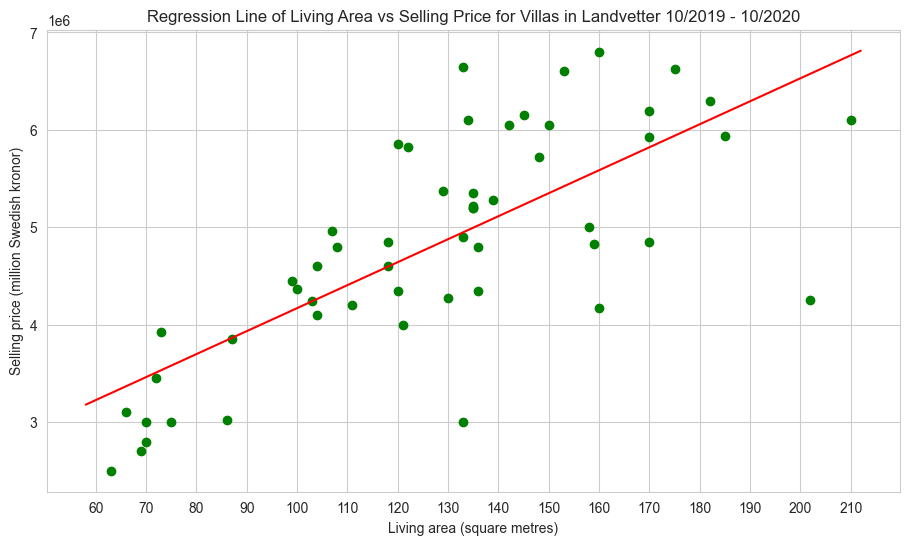

In [100]:
# Construct a linear regression model and visualise the regression line
model = LinearRegression()
model.fit(df['Living_area'].values[:, np.newaxis], df['Selling_price'])
xfit = np.array([58, 212])
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], df['Selling_price'], color='green')
plt.plot(xfit, yfit, color='red')

plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Selling price (million Swedish kronor)')

plt.title('Regression Line of Living Area vs Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

#### ***b. What are the values of the slope and intercept of the regression line?***

In [101]:
# Find the values of the slope and the intercept with the help of the constructed model
print('The value of the slope (gradient) is:', model.coef_[0])
print('The value of the intercept is:', model.intercept_)

The value of the slope (gradient) is: 23597.794749444976
The value of the intercept is: 1809821.2159409611


#### ***c. Use this model to predict the selling price of houses which have living area 100 m2, 150 m2 and 200 m2.***

In [102]:
# Predict the selling price of the villas by using the constructed model
living_area_list = [100, 150, 200]
for current_living_area in living_area_list:
    print(f'The predicted selling price of a villa with a living area of {current_living_area} m2 is {model.predict(np.array([[current_living_area]]))[0]:.2f} Swedish kronor.')

The predicted selling price of a villa with a living area of 100 m2 is 4169600.69 Swedish kronor.
The predicted selling price of a villa with a living area of 150 m2 is 5349490.43 Swedish kronor.
The predicted selling price of a villa with a living area of 200 m2 is 6529380.17 Swedish kronor.


#### ***d. Draw a residual plot.***

In [103]:
# Find correlation (quantifies the strength of a linear trend) using Numpy
y_pred = model.predict(df['Living_area'].values[:, np.newaxis])
correlation_matrix = np.corrcoef(df['Selling_price'], y_pred)
print(f'The correlation R between the actual selling prices and the predicted selling prices with the model is {correlation_matrix[0, 1]:.2f}.')

The correlation R between the actual selling prices and the predicted selling prices with the model is 0.73.


In [104]:
# Calculate the residuals by finding the difference between observed and expected (based on the model fit) 
residuals = df['Selling_price'] - y_pred

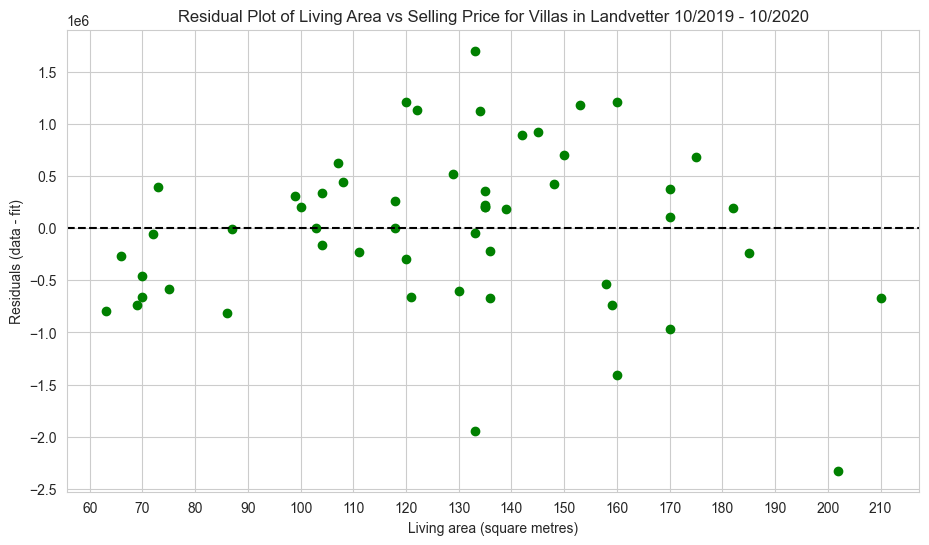

In [105]:
# Draw a residual plot
plt.figure(figsize=(11, 6))
plt.scatter(df['Living_area'], residuals, color='green')
plt.axhline(0, color='black', linestyle='--')

plt.xticks(range(60, 220, 10))
plt.xlabel('Living area (square metres)')
plt.ylabel('Residuals (data - fit)')

plt.title('Residual Plot of Living Area vs Selling Price for Villas in Landvetter 10/2019 - 10/2020')
plt.show()

### **Task 2: Classification**

#### ***a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.***

In [106]:
# Load Iris data set
iris = load_iris()
x_iris = iris.data[:, :2]
y_iris = iris.target
print('Feature names:', iris.feature_names)
print('Target names:', iris.target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [107]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2)

In [108]:
# Construct a logistic regression model
model_iris_logistic = LogisticRegression(max_iter=200)
model_iris_logistic.fit(X_train, y_train)
y_pred = model_iris_logistic.predict(X_test)

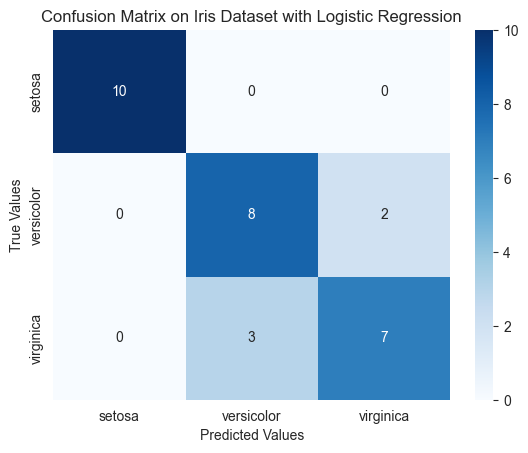

In [109]:
# Construct a confusion matrix to evaluate the use of the logistic regression model
conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Iris Dataset with Logistic Regression')
plt.show()

In [110]:
# Find the accuracy (the number of correct predictions divided by the total number of predictions) of the logistic regression model
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
print(f'The accuracy of the logistic regression model on the Iris dataset is {accuracy_logistic_regression:.2f}')

The accuracy of the logistic regression model on the Iris dataset is 0.83


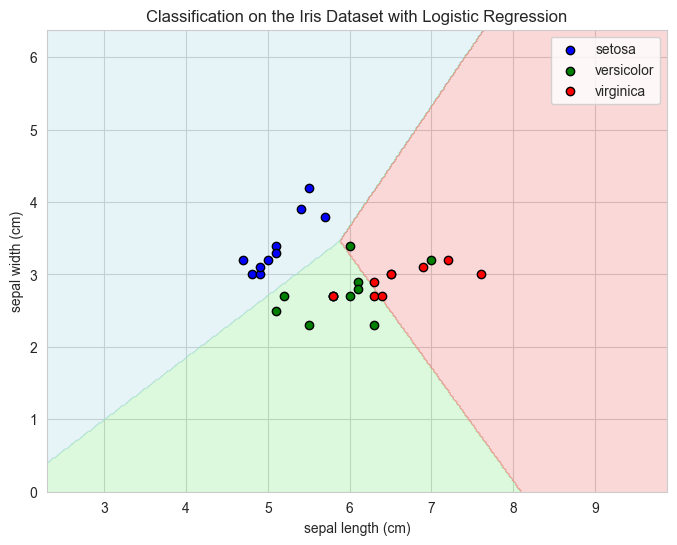

In [111]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 2, X_train[:, 0].max() + 2
y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_iris_logistic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(["lightblue", "lightgreen", "lightcoral"])
cmap_bold = ListedColormap(["blue", "green", "red"])

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)

for i, color in enumerate(cmap_bold.colors):
    idx = y_test == i
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, edgecolor="k", label=iris.target_names[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Classification on the Iris Dataset with Logistic Regression')

plt.legend()
plt.show()

#### ***b. Use k-nearest neighbours to classify the iris dataset with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?***

In [112]:
def knn_classifier(neighbours, weights, plot = True):
    model_iris_knn = KNeighborsClassifier(n_neighbors=neighbours, weights=weights)
    
    if plot == False:
         model_iris_knn.fit(X_train, y_train)
         y_pred = model_iris_knn.predict(x_iris)
         accuracy_knn = accuracy_score(y_iris, y_pred)
         return accuracy_knn
    
    model_iris_knn.fit(X_train, y_train)
    y_pred = model_iris_knn.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred)
    print(f'The accuracy of the KNN model with k = {neighbours}, w = "{weights}" on the Iris dataset is {accuracy_knn:.2f}')
    
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 2, X_train[:, 0].max() + 2
    y_min, y_max = X_train[:, 1].min() - 2, X_train[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model_iris_knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap_light = ListedColormap(["lightblue", "lightgreen", "lightcoral"])
    cmap_bold = ListedColormap(["blue", "green", "red"])
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    
    for i, color in enumerate(cmap_bold.colors):
        idx = y_test == i
        plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, edgecolor="k", label=iris.target_names[i])
    
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'Classification on the Iris Dataset with KNN k = {neighbours}, weights = {weights}')
    
    plt.legend()
    plt.show()
    
    return accuracy_knn

The accuracy of the KNN model with k = 1, w = "distance" on the Iris dataset is 0.77


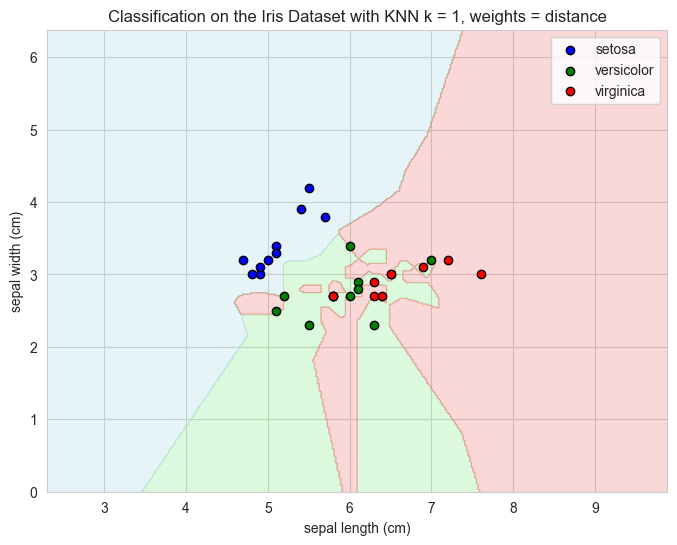

The accuracy of the KNN model with k = 2, w = "distance" on the Iris dataset is 0.77


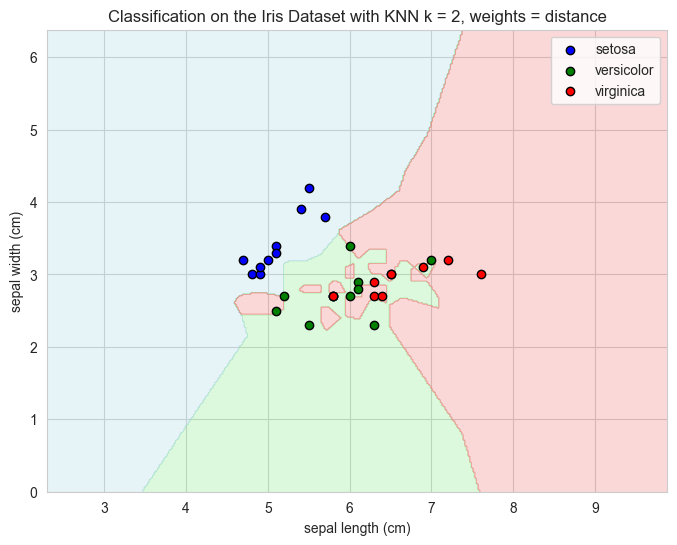

The accuracy of the KNN model with k = 3, w = "distance" on the Iris dataset is 0.80


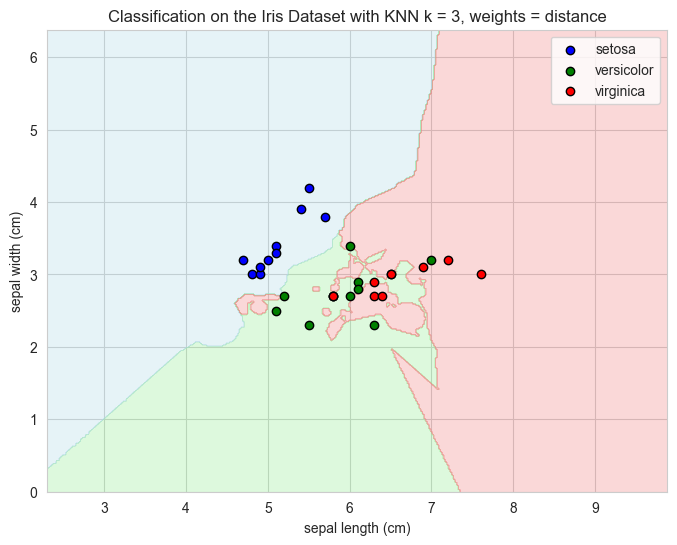

The accuracy of the KNN model with k = 4, w = "distance" on the Iris dataset is 0.80


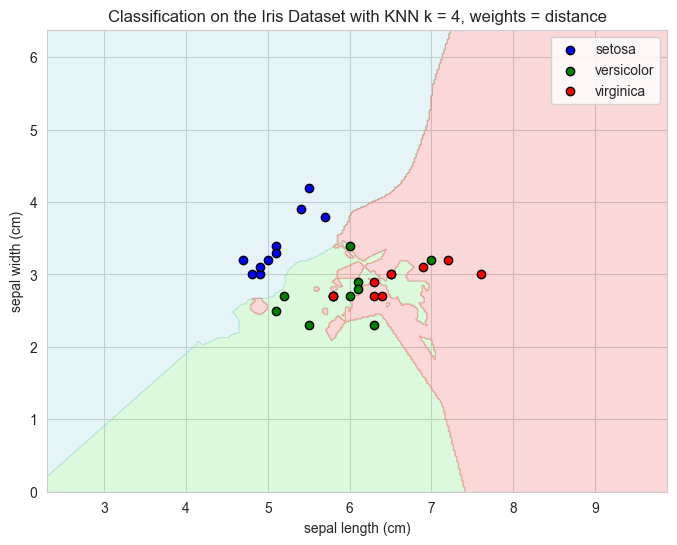

The accuracy of the KNN model with k = 5, w = "distance" on the Iris dataset is 0.83


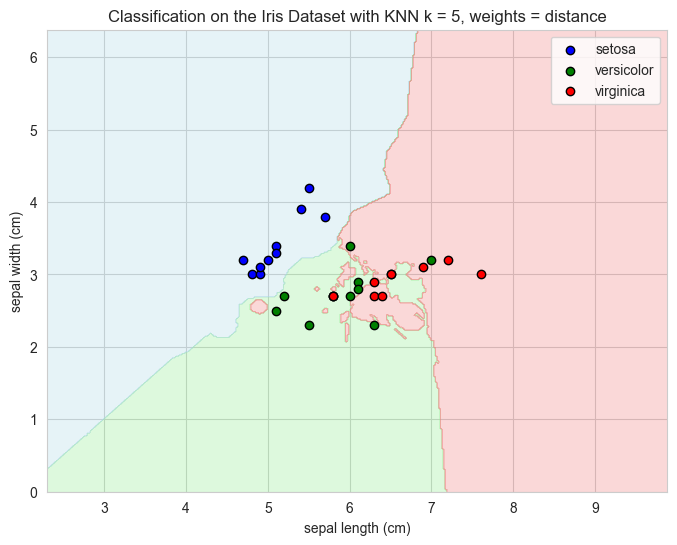

The accuracy of the KNN model with k = 6, w = "distance" on the Iris dataset is 0.83


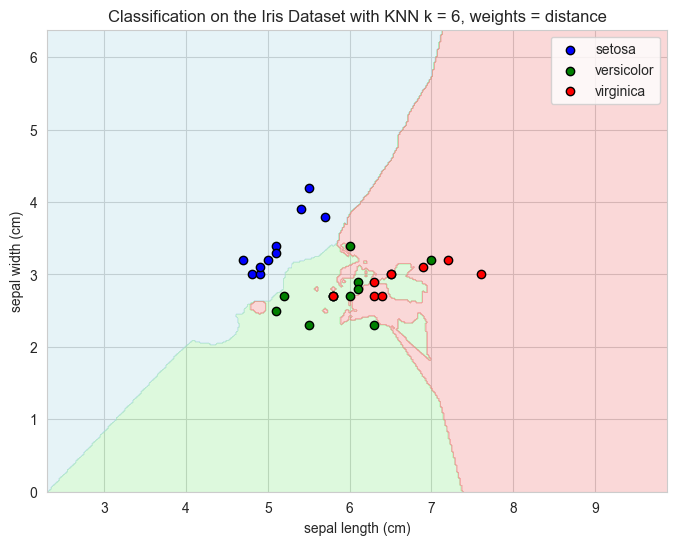

The accuracy of the KNN model with k = 7, w = "distance" on the Iris dataset is 0.83


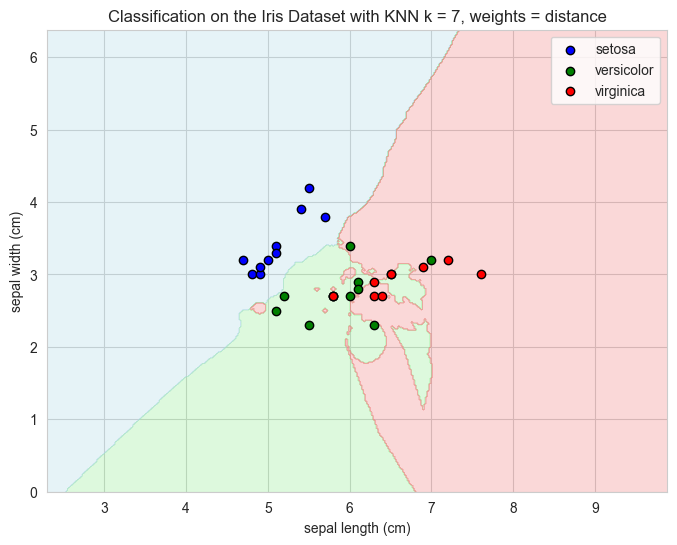

The accuracy of the KNN model with k = 8, w = "distance" on the Iris dataset is 0.83


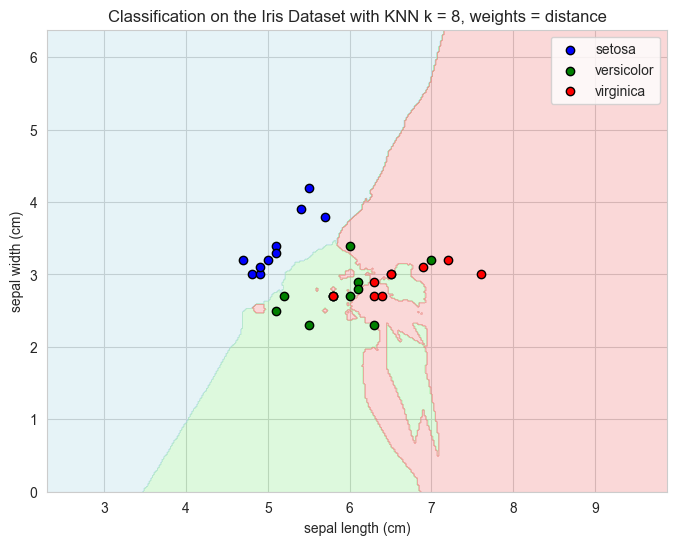

The accuracy of the KNN model with k = 9, w = "distance" on the Iris dataset is 0.80


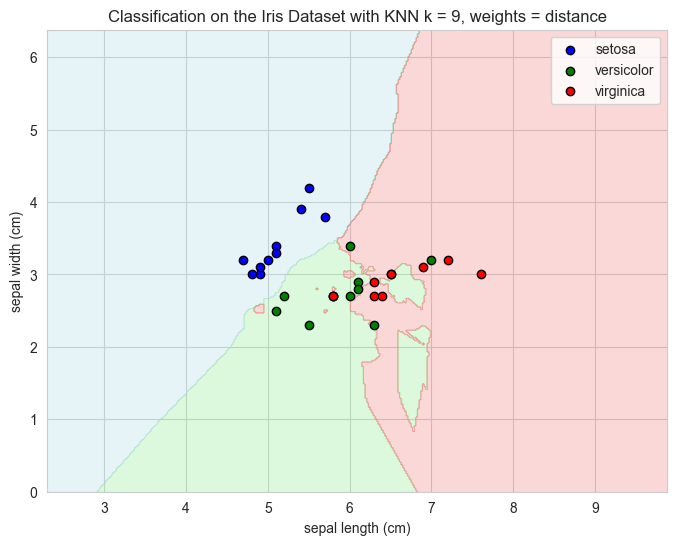

The accuracy of the KNN model with k = 10, w = "distance" on the Iris dataset is 0.80


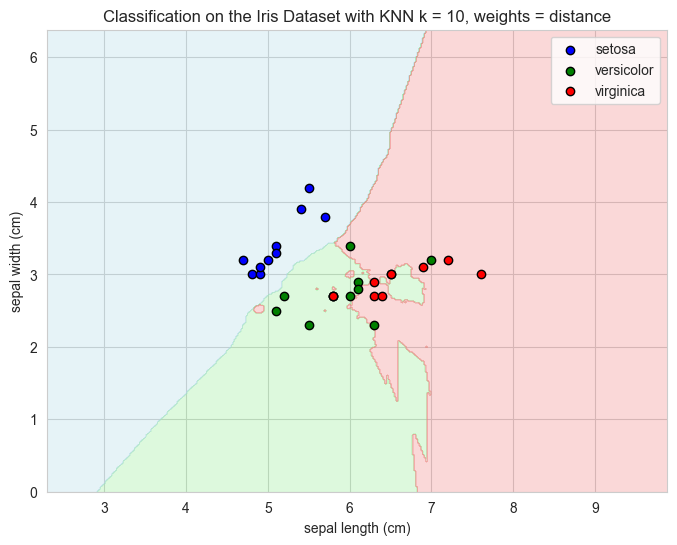

The accuracy of the KNN model with k = 11, w = "distance" on the Iris dataset is 0.80


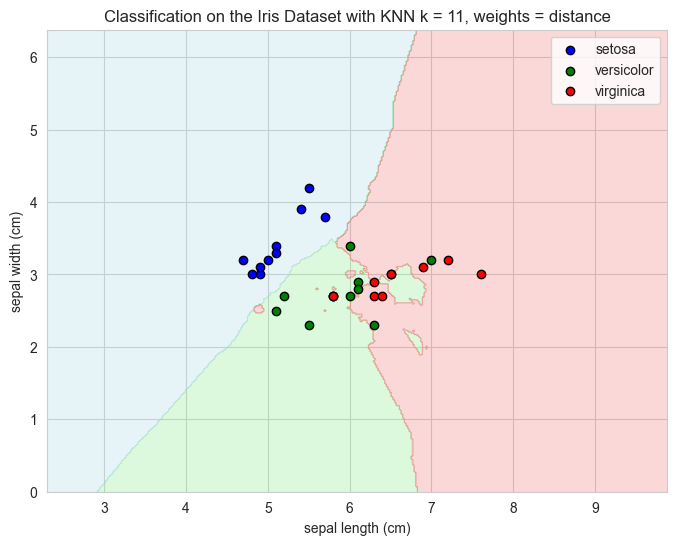

The accuracy of the KNN model with k = 12, w = "distance" on the Iris dataset is 0.80


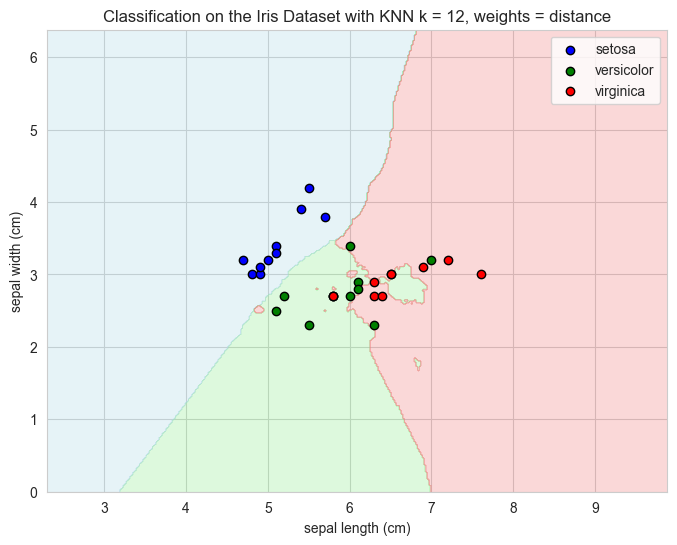

The accuracy of the KNN model with k = 13, w = "distance" on the Iris dataset is 0.80


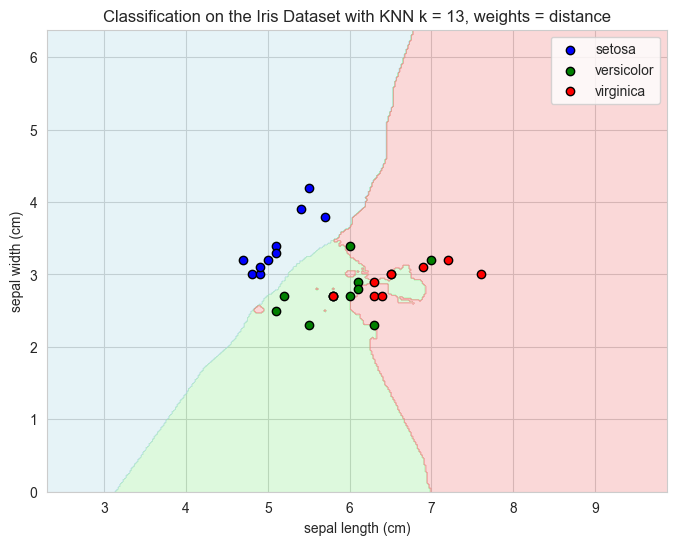

The accuracy of the KNN model with k = 14, w = "distance" on the Iris dataset is 0.80


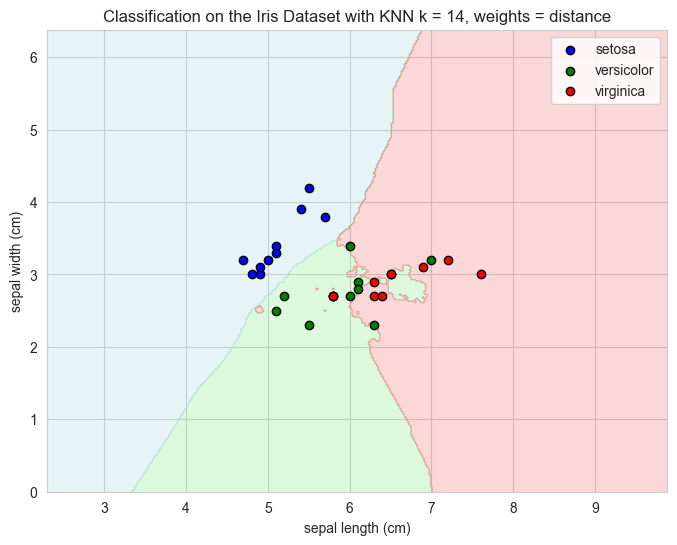

The accuracy of the KNN model with k = 15, w = "distance" on the Iris dataset is 0.83


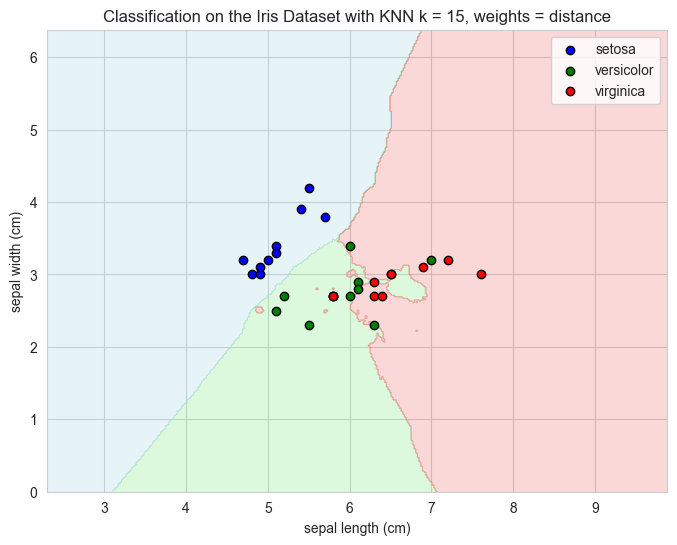

[0.7666666666666667, 0.7666666666666667, 0.8, 0.8, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8333333333333334]


In [113]:
accuracy_list_knn_distance = []
for i in range(1, 16):
    accuracy_list_knn_distance.append(knn_classifier(i, 'distance'))
print(accuracy_list_knn_distance)
accuracy_series_knn_distance = pd.Series(accuracy_list_knn_distance)

The accuracy of the KNN model with k = 1, w = "uniform" on the Iris dataset is 0.77


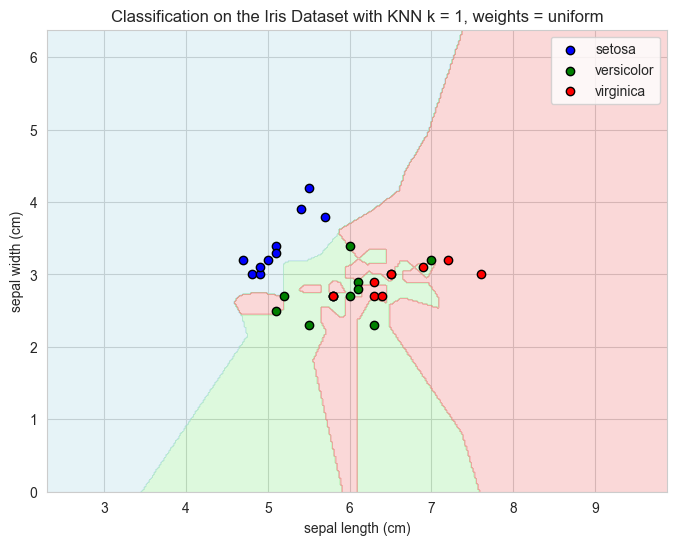

The accuracy of the KNN model with k = 2, w = "uniform" on the Iris dataset is 0.80


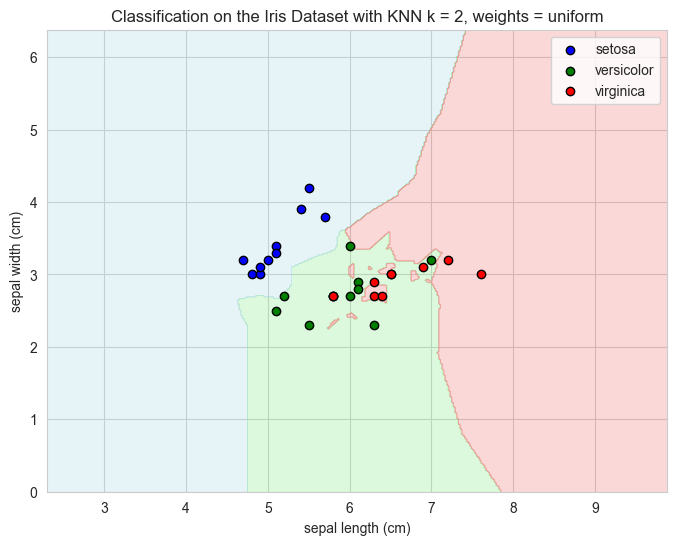

The accuracy of the KNN model with k = 3, w = "uniform" on the Iris dataset is 0.77


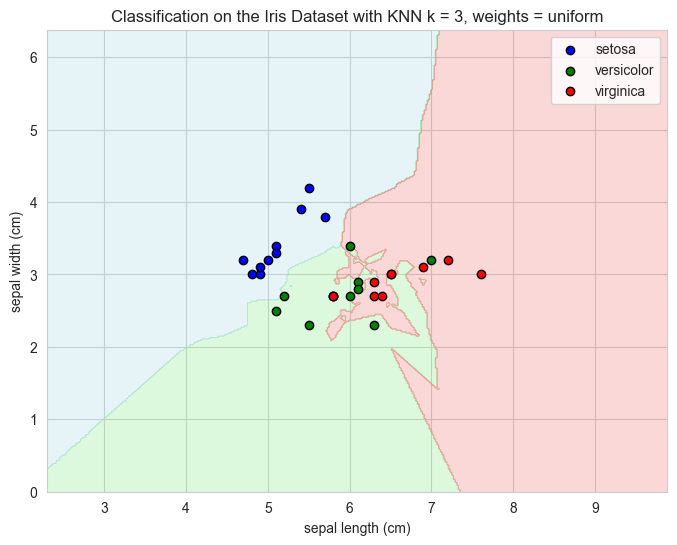

The accuracy of the KNN model with k = 4, w = "uniform" on the Iris dataset is 0.80


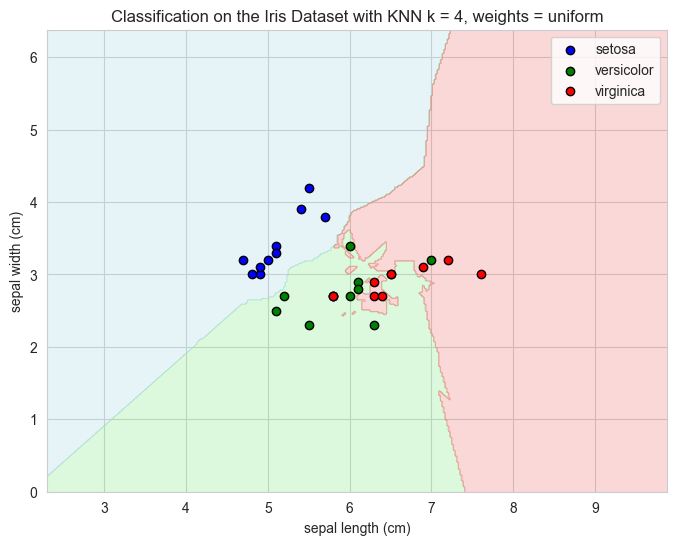

The accuracy of the KNN model with k = 5, w = "uniform" on the Iris dataset is 0.80


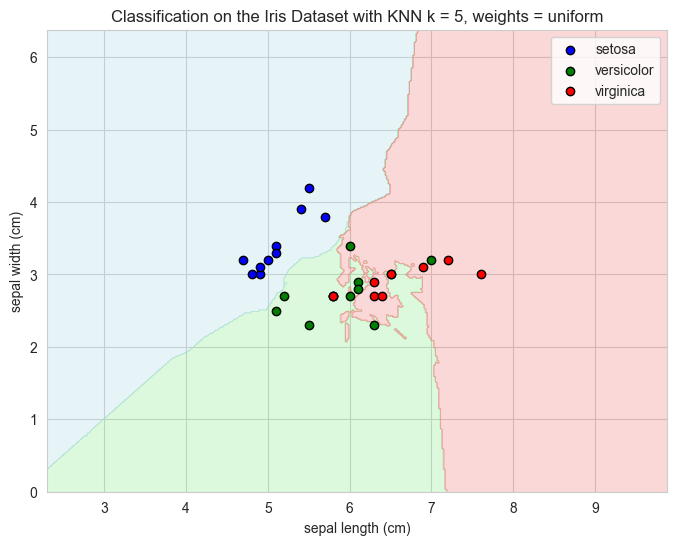

The accuracy of the KNN model with k = 6, w = "uniform" on the Iris dataset is 0.80


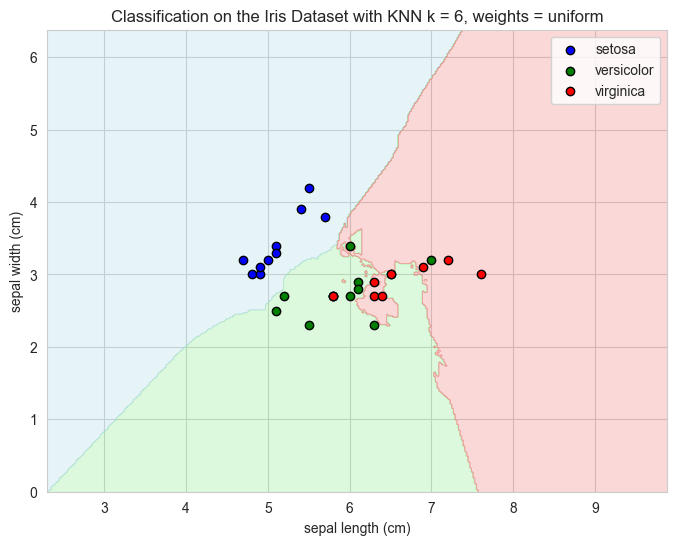

The accuracy of the KNN model with k = 7, w = "uniform" on the Iris dataset is 0.77


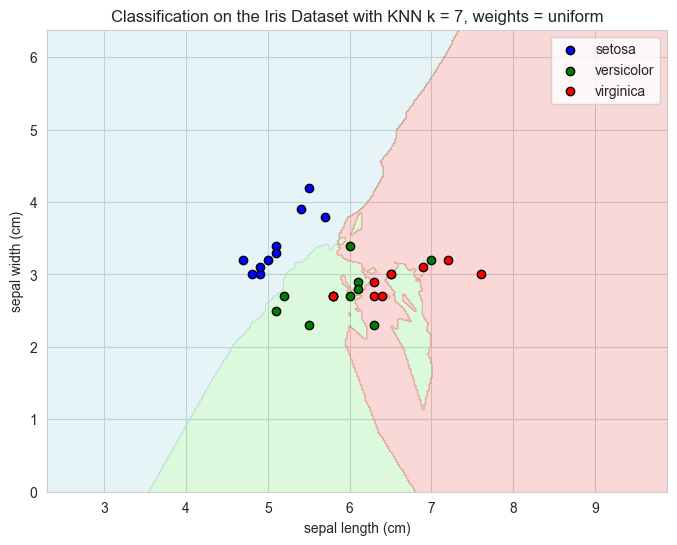

The accuracy of the KNN model with k = 8, w = "uniform" on the Iris dataset is 0.73


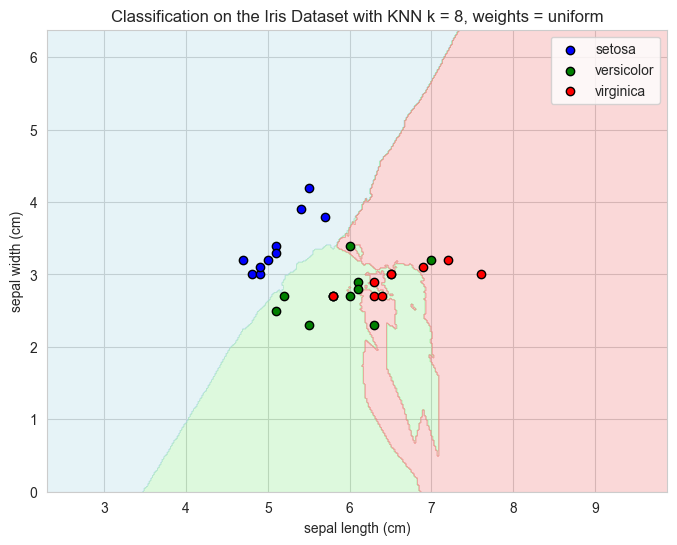

The accuracy of the KNN model with k = 9, w = "uniform" on the Iris dataset is 0.73


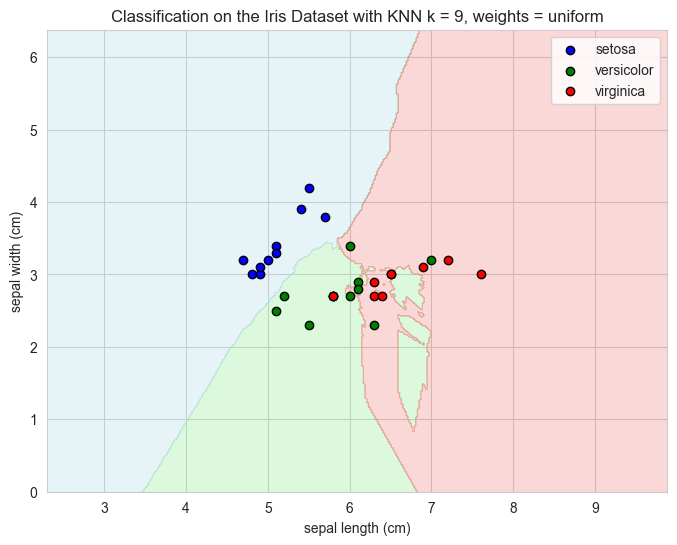

The accuracy of the KNN model with k = 10, w = "uniform" on the Iris dataset is 0.63


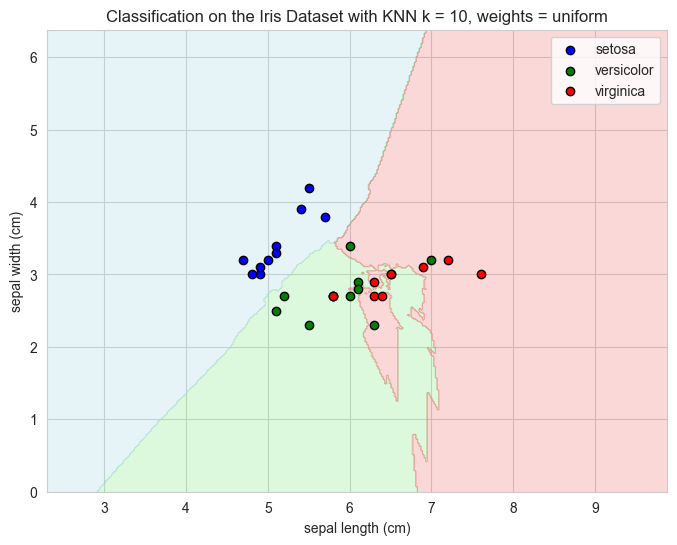

The accuracy of the KNN model with k = 11, w = "uniform" on the Iris dataset is 0.70


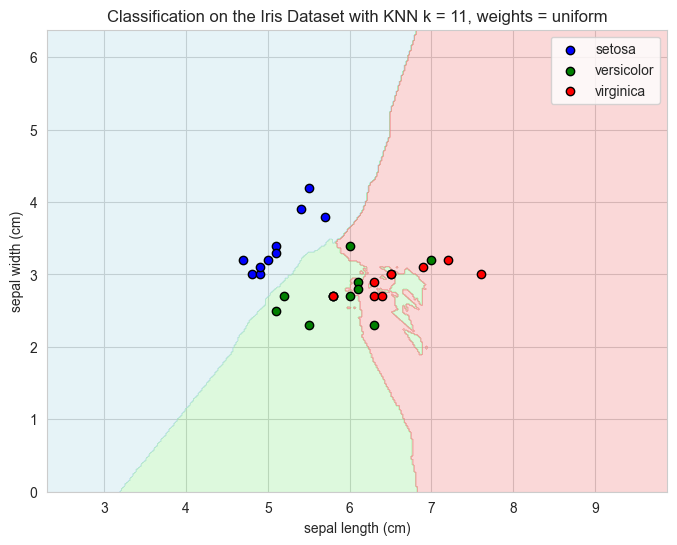

The accuracy of the KNN model with k = 12, w = "uniform" on the Iris dataset is 0.67


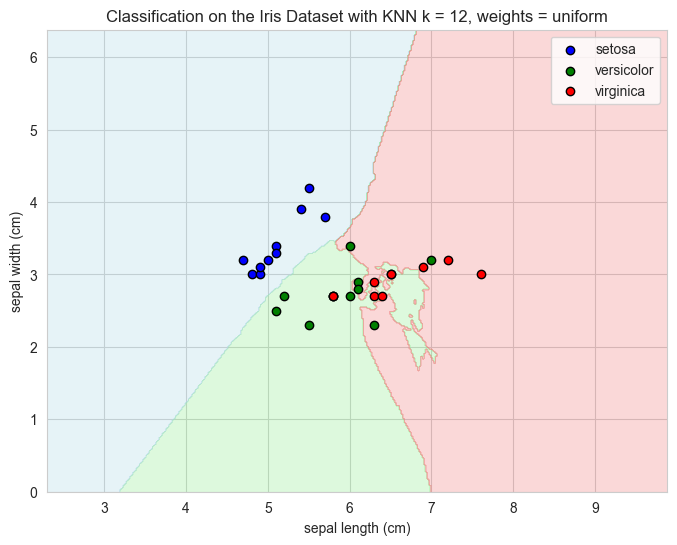

The accuracy of the KNN model with k = 13, w = "uniform" on the Iris dataset is 0.73


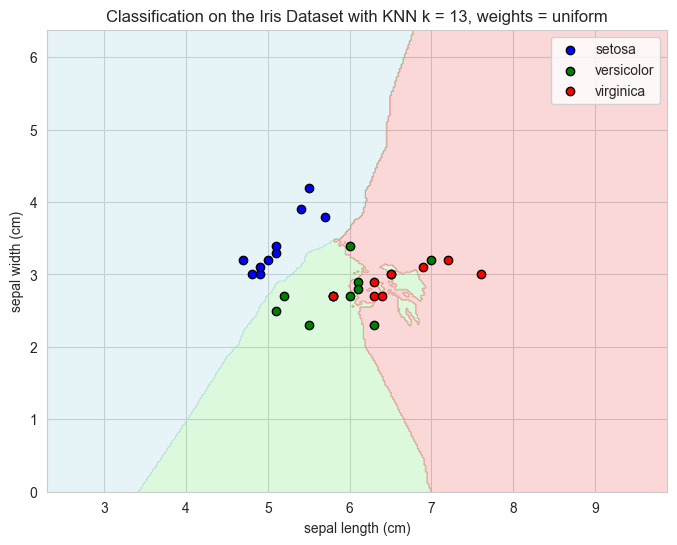

The accuracy of the KNN model with k = 14, w = "uniform" on the Iris dataset is 0.70


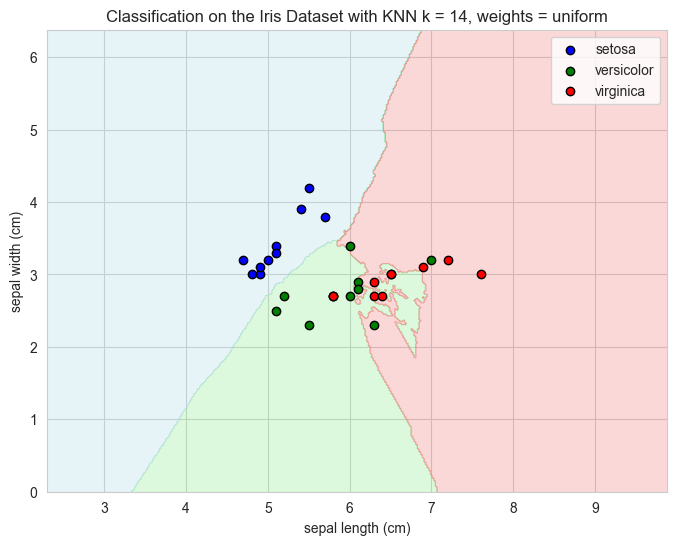

The accuracy of the KNN model with k = 15, w = "uniform" on the Iris dataset is 0.70


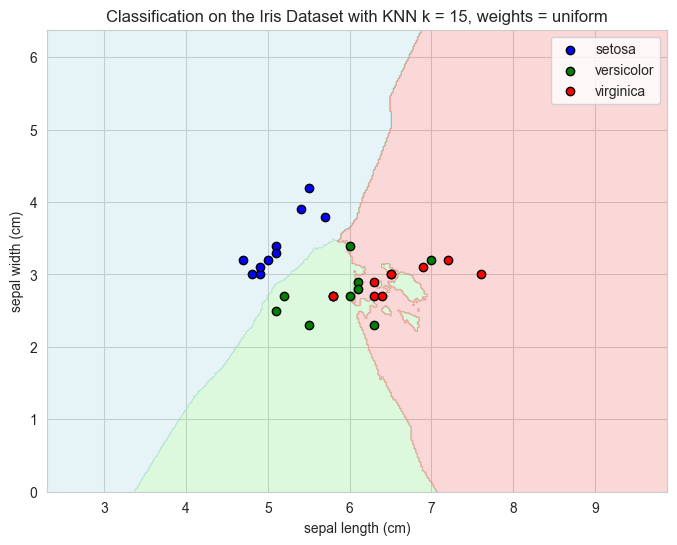

[0.7666666666666667, 0.8, 0.7666666666666667, 0.8, 0.8, 0.8, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.6333333333333333, 0.7, 0.6666666666666666, 0.7333333333333333, 0.7, 0.7]


In [114]:
accuracy_list_knn_uniform = []
for i in range(1, 16):
    accuracy_list_knn_uniform.append(knn_classifier(i, 'uniform'))
print(accuracy_list_knn_uniform)
accuracy_series_knn_uniform = pd.Series(accuracy_list_knn_uniform)

In [115]:
accuracy_list_knn_distance = []
for i in range(1, 61):
    accuracy_list_knn_distance.append(knn_classifier(i, 'distance', plot=False))
accuracy_series_knn_distance = pd.Series(accuracy_list_knn_distance)

In [116]:
accuracy_list_knn_uniform = []
for i in range(1, 61):
    accuracy_list_knn_uniform.append(knn_classifier(i, 'uniform', plot=False))
accuracy_series_knn_uniform = pd.Series(accuracy_list_knn_uniform)

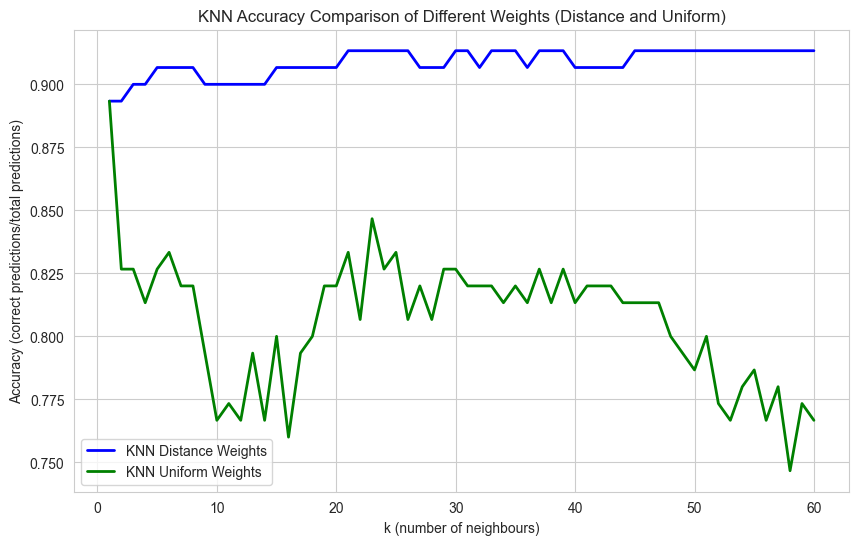

In [117]:
accuracy_series_knn_distance.index = range(1, len(accuracy_list_knn_distance) + 1)
accuracy_series_knn_uniform.index = range(1, len(accuracy_list_knn_uniform) + 1)

plt.figure(figsize=(10, 6))

plt.plot(accuracy_series_knn_distance.index, accuracy_series_knn_distance, 
         label='KNN Distance Weights', color='blue', linewidth=2)

plt.plot(accuracy_series_knn_uniform.index, accuracy_series_knn_uniform, 
         label='KNN Uniform Weights', color='green', linewidth=2)

plt.xlabel('k (number of neighbours)')
plt.ylabel('Accuracy (correct predictions/total predictions)')
plt.title('KNN Accuracy Comparison of Different Weights (Distance and Uniform)')

plt.legend()

plt.show()

#### ***c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question b) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.***

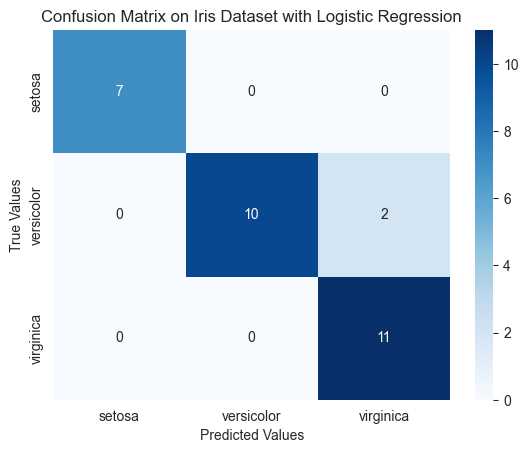

The accuracy of the logistic regression model on the Iris dataset is 0.93


In [138]:
x_iris = iris.data
y_iris = iris.target

X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.2)
model_iris_logistic = LogisticRegression(max_iter=200)
model_iris_logistic.fit(X_train, y_train)
y_pred = model_iris_logistic.predict(X_test)

conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_logistic_regression, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Iris Dataset with Logistic Regression')
plt.show()
accuracy_logistic_regression = accuracy_score(y_test, y_pred)
print(f'The accuracy of the logistic regression model on the Iris dataset is {accuracy_logistic_regression:.2f}')

In [139]:
cv_scores_logistic_regression = cross_val_score(model_iris_logistic, x_iris, y_iris, cv=5)
print(f"Average accuracy of linear regression model with 5-fold cross validation: {np.mean(cv_scores_logistic_regression):.2f}")

Average accuracy of linear regression model with 5-fold cross validation: 0.97


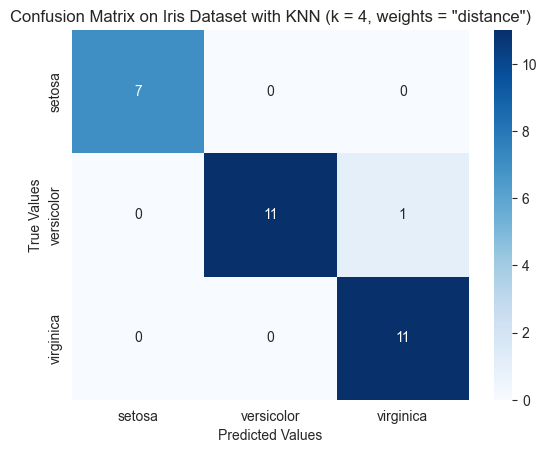

The accuracy of the KNN model with k = 4, weights = "distance" on the Iris dataset is 0.97


In [142]:
model_iris_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')    
model_iris_knn.fit(X_train, y_train)
y_pred = model_iris_knn.predict(X_test)

# Construct a confusion matrix to evaluate the use of the KNN model with k = 40, weights = 'distance'
conf_matrix_knn = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix on Iris Dataset with KNN (k = 4, weights = "distance")')
plt.show()

# Find the accuracy (the number of correct predictions divided by the total number of predictions) of the logistic regression model
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'The accuracy of the KNN model with k = 4, weights = "distance" on the Iris dataset is {accuracy_knn:.2f}')

In [141]:
cv_scores_knn = cross_val_score(model_iris_knn, x_iris, y_iris, cv=5)
print(f"Average accuracy of KNN model with 5-fold cross validation: {np.mean(cv_scores_knn):.2f}")

Average accuracy of KNN model with 5-fold cross validation: 0.97
